In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import time_series_analysis
from datetime import datetime
from dateutil.relativedelta import relativedelta

area_start_date = '2001-01-01'
area_end_date = '2024-01-01'
date_fmt = '%Y-%m-%d'
area_start_date = datetime.strptime(area_start_date, date_fmt)
area_end_date = datetime.strptime(area_end_date, date_fmt)
current_date = area_start_date
area_columns = []
while current_date < area_end_date:
    area_columns.append(current_date.strftime(date_fmt))
    current_date += relativedelta(months=1)
area_start_year = area_start_date.year
area_end_year = area_end_date.year
years = [i for i in range(area_start_year, area_end_year)]

area_mask_columns = [f'frozen_{col}' for col in area_columns]

lake_lse_csv_path = '/WORK/Data/global_lake_area/area_csvs/lakes/csv/lakes_all_with_aridity_and_permafrost_type.csv'
lake_lse_df = pd.read_csv(lake_lse_csv_path)
lake_lse_df = lake_lse_df[area_columns + area_mask_columns + ['Lake_type'] + ['ari_ix_uav', 'EXTENT']]
lake_lse_df['EXTENT'] = lake_lse_df['EXTENT'].astype(str)
annual_std_df = time_series_analysis.calculating_annual_stds(
    lake_lse_df=lake_lse_df,
    area_columns=area_columns,
    output_column_names=[f'annual_std_{i}' for i in years],
    unit_scale=1e-6,
    calculation_mask_columns=[f'frozen_{col}' for col in area_columns],
)

year_intervals = [i for i in range(area_start_year+1, area_end_year)]
annual_mean_first_diff_df = time_series_analysis.calculating_annual_mean_first_differences(
    lake_lse_df=lake_lse_df,
    area_columns=area_columns,
    output_column_names=[f'annual_mean_first_diff_{i}' for i in year_intervals],
    unit_scale=1e-6,
    calculation_mask_columns=[f'frozen_{col}' for col in area_columns],
)

Initializing pandarallel...
INFO: Pandarallel will run on 6 workers.
INFO: Pandarallel will use standard multiprocessing data transfer (pipe) to transfer data between the main process and workers.


/tmp/ipykernel_37015/3225867853.py:25: DtypeWarning: Columns (277) have mixed types. Specify dtype option on import or set low_memory=False.
  lake_lse_df = pd.read_csv(lake_lse_csv_path)
/usr/local/lib/python3.8/dist-packages/numpy/lib/nanfunctions.py:1872: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/usr/local/lib/python3.8/dist-packages/numpy/lib/nanfunctions.py:1872: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/usr/local/lib/python3.8/dist-packages/numpy/lib/nanfunctions.py:1872: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/usr/local/lib/python3.8/dist-packages/numpy/lib/nanfunctions.py:1872: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/usr/local/lib/python3.8/dist-packages/numpy/lib/nanfunctions.py:1872: Runti

### Another plot

In [1]:
from datetime import datetime
from dateutil.relativedelta import relativedelta
import pandas as pd
import geopandas as gpd
import numpy as np
from shapely.geometry import Point

area_start_date = '2001-01-01'
area_end_date = '2024-01-01'
date_fmt = '%Y-%m-%d'
area_start_date = datetime.strptime(area_start_date, date_fmt)
area_end_date = datetime.strptime(area_end_date, date_fmt)
current_date = area_start_date
area_columns = []
while current_date < area_end_date:
    area_columns.append(current_date.strftime(date_fmt))
    current_date += relativedelta(months=1)

# process basin-wise data
basin_pkl_path = '/WORK/Data/global_lake_area/hydrobasins/merged/hydrobasins_lev03_with_statistics.pkl'
basin_gdf = pd.read_pickle(basin_pkl_path)
basin_gdf['linear_trend_of_stl_trend_per_period_sum'] = basin_gdf['linear_trend_of_stl_trend_per_period_sum'] * 10
basins_with_increasing_long_term_trends = basin_gdf[basin_gdf['linear_trend_of_stl_trend_per_period_sum'] > 0]
basins_with_decreasing_long_term_trends = basin_gdf[basin_gdf['linear_trend_of_stl_trend_per_period_sum'] < 0]
lake_lse_csv_path = '/WORK/Data/global_lake_area/area_csvs/lakes/csv/lakes_all_with_aridity_and_permafrost_type.csv'
lake_lse_gdf = pd.read_csv(lake_lse_csv_path)
lake_lse_gdf = lake_lse_gdf[area_columns + ['Lake_type'] + ['ari_ix_uav', 'EXTENT'] + ['Pour_lat', 'Pour_long']]

lake_lse_lat_column = 'Pour_lat'
lake_lse_lon_column = 'Pour_long'
lake_lse_gdf['geometry'] = [Point(xy) for xy in zip(lake_lse_gdf[lake_lse_lon_column], lake_lse_gdf[lake_lse_lat_column])]
lake_lse_gdf = gpd.GeoDataFrame(lake_lse_gdf, crs='EPSG:4326')
lakes_in_increasing_trend_basins = gpd.sjoin(lake_lse_gdf, basins_with_increasing_long_term_trends, how='inner', op='within')
lakes_in_decreasing_trend_basins = gpd.sjoin(lake_lse_gdf, basins_with_decreasing_long_term_trends, how='inner', op='within')

/tmp/ipykernel_30009/2013915003.py:26: DtypeWarning: Columns (277) have mixed types. Specify dtype option on import or set low_memory=False.
  lake_lse_gdf = pd.read_csv(lake_lse_csv_path)
/usr/local/lib/python3.8/dist-packages/IPython/core/interactiveshell.py:3448: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if await self.run_code(code, result, async_=asy):
/usr/local/lib/python3.8/dist-packages/IPython/core/interactiveshell.py:3448: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if await self.run_code(code, result, async_=asy):


In [2]:
# data for figure a
natural_area_time_series = lake_lse_gdf[lake_lse_gdf['Lake_type'] == 1][area_columns].sum(axis=0) * 1e-6
reservoir_area_time_series = lake_lse_gdf[lake_lse_gdf['Lake_type'] != 1][area_columns].sum(axis=0) * 1e-6
natural_area_time_series_anomaly = natural_area_time_series - natural_area_time_series.mean()
reservoir_area_time_series_anomaly = reservoir_area_time_series - reservoir_area_time_series.mean()
total_area_time_series_anomaly = natural_area_time_series_anomaly + reservoir_area_time_series_anomaly
# data for figure b
increasing_natural_area_time_series = lakes_in_increasing_trend_basins[lakes_in_increasing_trend_basins['Lake_type'] == 1][area_columns].sum(axis=0) * 1e-6
increasing_reservoir_area_time_series = lakes_in_increasing_trend_basins[lakes_in_increasing_trend_basins['Lake_type'] != 1][area_columns].sum(axis=0) * 1e-6
increasing_natural_area_time_series_anomaly = increasing_natural_area_time_series - increasing_natural_area_time_series.mean()
increasing_reservoir_area_time_series_anomaly = increasing_reservoir_area_time_series - increasing_reservoir_area_time_series.mean()
increasing_total_area_time_series_anomaly = increasing_natural_area_time_series_anomaly + increasing_reservoir_area_time_series_anomaly
# data for figure c
decreasing_natural_area_time_series = lakes_in_decreasing_trend_basins[lakes_in_decreasing_trend_basins['Lake_type'] == 1][area_columns].sum(axis=0) * 1e-6
decreasing_reservoir_area_time_series = lakes_in_decreasing_trend_basins[lakes_in_decreasing_trend_basins['Lake_type'] != 1][area_columns].sum(axis=0) * 1e-6
decreasing_natural_area_time_series_anomaly = decreasing_natural_area_time_series - decreasing_natural_area_time_series.mean()
decreasing_reservoir_area_time_series_anomaly = decreasing_reservoir_area_time_series - decreasing_reservoir_area_time_series.mean()
decreasing_total_area_time_series_anomaly = decreasing_natural_area_time_series_anomaly + decreasing_reservoir_area_time_series_anomaly

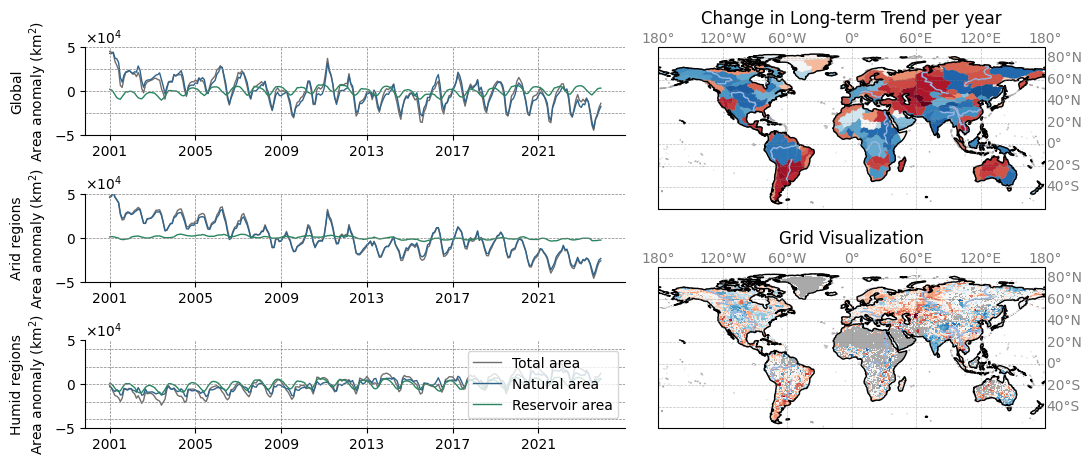

In [6]:
import matplotlib.ticker as ticker
from scipy.stats import linregress
import matplotlib.pyplot as plt
import sys
sys.path.append('../..')
sys.path.append('../basin_wise_analysis')
import basin_wise_analysis
import visualization as vis
import cartopy.crs as ccrs
ax_mosaic = """
    ad
    ad
    bd
    be
    ce
    ce
"""

per_ax_kwargs = {
    'd': {'projection': ccrs.PlateCarree()},
    'e': {'projection': ccrs.PlateCarree()}
}

fig, ax = plt.subplot_mosaic(
    ax_mosaic,
    figsize=(290/25.4, 120/25.4),
    per_subplot_kw=per_ax_kwargs,
    tight_layout=True,
)

colors_for_total_natual_reservoir = ['#716e6d', '#30638a', '#2a8560']
# generate general monthly data x values
monthly_date_range = pd.date_range(start='2001-01-01', end='2023-12-01', freq='MS')
annually_year_range_for_std = np.arange(2001, 2024)
annually_year_range_for_first_diff = np.arange(2002, 2024)
bar_width = 0.5
y_lims_for_area_anomaly = [-50000, 50000]
bar_edge_color = 'black'

#plotting for figure a
ax['a'].plot(monthly_date_range, total_area_time_series_anomaly, label='Total area (arid)', color=colors_for_total_natual_reservoir[0], linewidth=1)
ax['a'].plot(monthly_date_range, natural_area_time_series_anomaly, label='Natural area (arid)', color=colors_for_total_natual_reservoir[1], linewidth=1)
ax['a'].plot(monthly_date_range, reservoir_area_time_series_anomaly, label='Reservoir area (arid)', color=colors_for_total_natual_reservoir[2], linewidth=1)
ax['a'].set_xticks(pd.date_range(start='2001-01-01', end='2023-12-01', freq='4YS'))
ax['a'].set_xticklabels(pd.date_range(start='2001-01-01', end='2023-12-01', freq='4YS').year)
for year in pd.date_range(start='2001-01-01', end='2024-12-01', freq='4YS'):
    ax['a'].axvline(x=year, color='grey', linestyle='--', linewidth=0.5)
for y_tick in ax['a'].get_yticks():
    ax['a'].axhline(y=y_tick, color='grey', linestyle='--', linewidth=0.5)
ax['a'].yaxis.set_major_formatter(ticker.ScalarFormatter(useMathText=True))
ax['a'].ticklabel_format(axis='y', style='sci', scilimits=(0, 0))
ax['a'].set_ylim(y_lims_for_area_anomaly)
ax['a'].set_ylabel('Global\nArea anomaly (km$^2$)')
ax['a'].spines['top'].set_visible(False)
ax['a'].spines['right'].set_visible(False)
# plotting for figure b
ax['b'].plot(monthly_date_range, decreasing_total_area_time_series_anomaly, label='Total area', color=colors_for_total_natual_reservoir[0], linewidth=1)
ax['b'].plot(monthly_date_range, decreasing_natural_area_time_series_anomaly, label='Natural area', color=colors_for_total_natual_reservoir[1], linewidth=1)
ax['b'].plot(monthly_date_range, decreasing_reservoir_area_time_series_anomaly, label='Reservoir area', color=colors_for_total_natual_reservoir[2], linewidth=1)
ax['b'].set_xticks(pd.date_range(start='2001-01-01', end='2023-12-01', freq='4YS'))
ax['b'].set_xticklabels(pd.date_range(start='2001-01-01', end='2023-12-01', freq='4YS').year)
for year in pd.date_range(start='2001-01-01', end='2024-12-01', freq='4YS'):
    ax['b'].axvline(x=year, color='grey', linestyle='--', linewidth=0.5)
for y_tick in ax['b'].get_yticks():
    ax['b'].axhline(y=y_tick, color='grey', linestyle='--', linewidth=0.5)
ax['b'].yaxis.set_major_formatter(ticker.ScalarFormatter(useMathText=True))
ax['b'].ticklabel_format(axis='y', style='sci', scilimits=(0, 0))
ax['b'].set_ylim(y_lims_for_area_anomaly)
ax['b'].set_ylabel('Arid regions\nArea anomaly (km$^2$)')
ax['b'].spines['top'].set_visible(False)
ax['b'].spines['right'].set_visible(False)
#plotting for figure c
ax['c'].plot(monthly_date_range, increasing_total_area_time_series_anomaly, label='Total area', color=colors_for_total_natual_reservoir[0], linewidth=1)
ax['c'].plot(monthly_date_range, increasing_natural_area_time_series_anomaly, label='Natural area', color=colors_for_total_natual_reservoir[1], linewidth=1)
ax['c'].plot(monthly_date_range, increasing_reservoir_area_time_series_anomaly, label='Reservoir area', color=colors_for_total_natual_reservoir[2], linewidth=1)
ax['c'].set_xticks(pd.date_range(start='2001-01-01', end='2023-12-01', freq='4YS'))
ax['c'].set_xticklabels(pd.date_range(start='2001-01-01', end='2023-12-01', freq='4YS').year)
for year in pd.date_range(start='2001-01-01', end='2024-12-01', freq='4YS'):
    ax['c'].axvline(x=year, color='grey', linestyle='--', linewidth=0.5)
for y_tick in ax['c'].get_yticks():
    ax['c'].axhline(y=y_tick, color='grey', linestyle='--', linewidth=0.5)
ax['c'].yaxis.set_major_formatter(ticker.ScalarFormatter(useMathText=True))
ax['c'].ticklabel_format(axis='y', style='sci', scilimits=(0, 0)) 
ax['c'].set_ylim(y_lims_for_area_anomaly)
ax['c'].set_ylabel('Humid regions\nArea anomaly (km$^2$)')
ax['c'].spines['top'].set_visible(False)
ax['c'].spines['right'].set_visible(False)
ax['c'].legend()



basin_wise_analysis.plot_hydrobasins_map_new(
    hydrobasins_gdf=basin_gdf,
    column_to_plot='linear_trend_of_stl_trend_per_period_sum',
    title='Change in Long-term Trend per year',
    use_log_scale_color=True,
    edgecolor='none',
    draw_colorbar=False,
    show=False,
    ax=ax['d'],
    set_global=False,
    extent=[-180, -60, 180, 90],
)

grid_pkl_path = '/WORK/Data/global_lake_area/area_csvs/grids/pkl/grid_all.pkl'
grid_gdf = pd.read_pickle(grid_pkl_path)
grid_gdf['linear_trend_of_stl_trend_per_period_sum'] = grid_gdf['linear_trend_of_stl_trend_per_period_sum'] * 10
ax = vis.plot_grid(
    grid_gdf=grid_gdf.copy(),
    projection=ccrs.PlateCarree(),
    color_column='linear_trend_of_stl_trend_percentage_per_period_median',
    gridlines=True,
    add_rivers=True,
    use_log_scale_color=True,
    set_global=False,
    extent=[-180, -60, 180, 90],
    show=False,
    draw_colorbar=False,
    ax=ax['e'],
)

fig.savefig('long_term_trend_fig.pdf', bbox_inches='tight', format='pdf')